In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

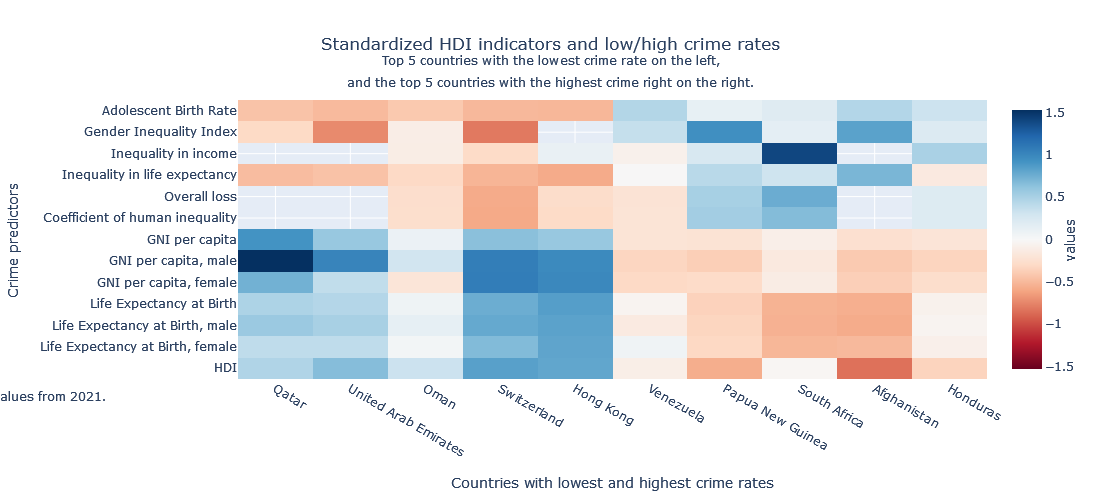

In [30]:
#load datasets
crime = pd.read_csv("datasets/crime-rate-by-country-2023.csv")
HDI = pd.read_csv("datasets/Human Development Index.csv")

# index = country
crime = crime.groupby('country').first()
HDI = HDI.groupby('Country').first()

# filter data 2021
stats_2021 = [col for col in HDI.columns if '2021' in col]
HDI_2021 = HDI[stats_2021]

HC = HDI_2021.copy()
HC = HC.loc[:, [#'HDI Rank (2021)',
             'Human Development Index (2021)',
             'Life Expectancy at Birth, female (2021)',
            'Life Expectancy at Birth, male (2021)',
            'Life Expectancy at Birth (2021)',
             'Gross National Income Per Capita, female (2021)',
             'Gross National Income Per Capita, male (2021)',
            'Gross National Income Per Capita (2021)',
             'Coefficient of human inequality (2021)',
             'Overall loss (%) (2021)',
             'Inequality in life expectancy (2021)',
             'Inequality in income (2021)',
             'Gender Inequality Index (2021)',
             'Adolescent Birth Rate (births per 1,000 women ages 15-19) (2021)']]

HC.rename(columns = {'Human Development Index (2021)': 'HDI',
                     'Life Expectancy at Birth (2021)': 'Life Expectancy at Birth',
                     'Life Expectancy at Birth, male (2021)' : 'Life Expectancy at Birth, male',
                     'Life Expectancy at Birth, female (2021)' : 'Life Expectancy at Birth, female',
                    'Gross National Income Per Capita (2021)' : 'GNI per capita',
                     'Gross National Income Per Capita, male (2021)' : 'GNI per capita, male',
                      'Gross National Income Per Capita, female (2021)' : 'GNI per capita, female',
                     'Inequality-adjusted Human Development Index (2021)' : 'Inequality-adjusted HDI',
                    'Coefficient of human inequality (2021)' : 'Coefficient of human inequality',
                    'Overall loss (%) (2021)' : 'Overall loss', 'Inequality in life expectancy (2021)' : 'Inequality in life expectancy',
                    'Inequality in income (2021)' : 'Inequality in income',
                    'Gender Inequality Index (2021)' : 'Gender Inequality Index',
                    'Adolescent Birth Rate (births per 1,000 women ages 15-19) (2021)' : 'Adolescent Birth Rate'}, inplace=True)

# standardize data
HC_standardized = 2 * (HC - HC.mean()) / (HC.max() - HC.min())

HCC = crime.join(HC_standardized)
HCC = HCC.drop(columns=['rank', 'pop2023'])

low5 = HCC.nsmallest(6, 'crimeIndex')
high5 = HCC.nlargest(5, 'crimeIndex')

df = pd.concat([low5, high5])
df = df.drop("Taiwan", axis='index')

df = df.drop(columns=['crimeIndex'])

df = df.T

HDIfig = go.Figure(data=go.Heatmap(z=df.values,
                                   x=df.columns,
                                   y=df.index,
                                   colorscale='RdBu',
                                   zmid=0,
                                   colorbar=dict(title='values', titleside='right')))

# Update layout for better visualization
HDIfig.update_layout(
    title={
        'text': 'Standardized HDI indicators and low/high crime rates<br><sup>Top 5 countries with the lowest crime rate on the left,<br>and the top 5 countries with the highest crime right on the right.</sup>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Countries with lowest and highest crime rates',
    yaxis_title='Crime predictors',
    xaxis=dict(tickmode='array', tickvals=list(range(len(df.columns))), ticktext=df.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(df.index))), ticktext=df.index)
)

HDIfig.update_layout(
    height=500
)

HDIfig.add_annotation(x=-0.37, y=-0.10,
                   xref="paper", yref="paper",
                   align='left',
                   xanchor='left', yanchor='bottom',
                   showarrow=False,
                   text='HDI values from 2021.'
                  )

# Show the interactive heatmap
HDIfig.show()